In [1]:
from datascience import *
%matplotlib inline

import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import numpy as np

import warnings
warnings.simplefilter("ignore")

## Review

In slides.

## New material

This midterm is out of 25 points.

In [113]:
scores = Table.read_table('scores_by_section.csv')
scores.show(5)

Section,Midterm
1,22
2,12
2,23
2,14
1,20


In [114]:
scores.group('Section').show(12)

Section,count
1,32
2,32
3,27
4,30
5,33
6,32
7,24
8,29
9,30
10,34


In [115]:
scores.group('Section', np.average).show()

Section,Midterm average
1,15.5938
2,15.125
3,13.6667
4,14.7667
5,17.4545
6,15.0312
7,16.625
8,16.3103
9,14.5667
10,15.2353


In [116]:
section_3_average = scores.group('Section', np.average).column('Midterm average').item(2)

In [117]:
section_3_size = scores.group('Section').column('count').item(2)

In [132]:
random_section = scores.sample(27, with_replacement=False)
random_section

Section,Midterm
8,19
9,4
4,15
12,17
1,25
6,13
9,24
3,11
7,17
12,19


In [134]:
np.average(random_section.column('Midterm'))

15.407407407407407

In [111]:
np.average(scores.sample(27, with_replacement=False).column('Midterm'))

17.037037037037038

- Null hypothesis: The average score of section 3 is no different from a random section of 27 students sampled from the class.
- Alternative: The average score of section 3 is lower than what we would expect from a random section of 27 students sampled from the class. There is something other than randomness causing the low average.

**Discussion Task [2 min]:** Simulate 10000 test statistics to help test these hypotheses. 

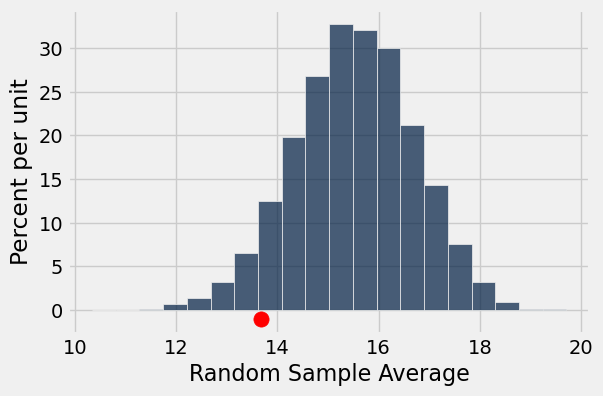

In [81]:
averages_tbl = Table().with_column('Random Sample Average', sample_averages)
averages_tbl.hist(bins = 20)
plots.scatter(section_3_average, -0.01, color='red', s=120);

**Discussion Question [1 min]:** Imagine you are the instructor for this class and are in charge of supervising the TAs who staff each of the 12 sections. How might you approach the situation after seeing these results?


__________

**Task:** Demarcate the area of the simulated distribution of test statistics lower than the section 3 average with a vertical line.

In [98]:
sorted_averages = averages_tbl.sort(0).column(0)

In [104]:
five_percent_index = round(simulations * 0.05)
five_percent_index

500

In [105]:
five_percent_point = sorted_averages.item(five_percent_index)
five_percent_point

13.541666666666666

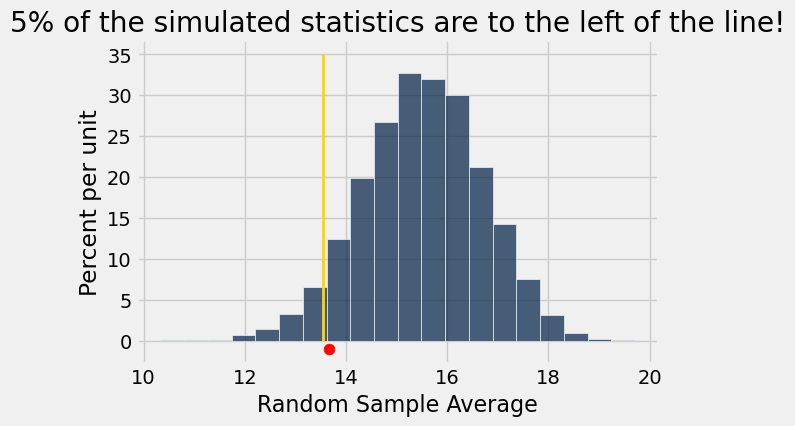

In [109]:
averages_tbl.hist(bins = 20)
plots.plot([five_percent_point, five_percent_point], [0, 0.35], color='gold', lw=2)
plots.title('5% of the simulated statistics are to the left of the line!');
plots.scatter(section_3_average, -0.01, color='red', s=60);

**Task:** Calculate the proportion of sample averages which are lower than the section 3 average which was observed.

In [89]:
sample_averages

array([ 15.20833333,  15.5       ,  15.875     , ...,  18.5       ,
        15.        ,  14.75      ])

In [88]:
section_3_average

13.666666666666666

In [91]:
sample_averages <= section_3_average

array([False, False, False, ..., False, False, False], dtype=bool)

In [92]:
np.count_nonzero(sample_averages)

10000

In [94]:
p_value = np.count_nonzero(sample_averages <= section_3_average) / simulations